In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns 
import geopandas as gpd
import folium
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt

/home/student.unimelb.edu.au/xinyij4/.local/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data_all = pd.read_csv("Iowa_Liquor_Sales.csv")
data_all.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [3]:
print("The entire dataset dimension: ",data_all.shape) # (12591077, 24)
print("Attributes:",data_all.columns) # (12591077, 24)

The entire dataset dimension:  (12591077, 24)
Attributes: Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')


In [4]:
# check missing values 
print("Missing values:\n",data_all.isnull().sum()) 

Missing values:
 Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            79178
County                   79178
Category                  8020
Category Name            16086
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost           10
State Bottle Retail         10
Bottles Sold                 0
Sale (Dollars)              10
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64


In [6]:
# drop records with missing values 
data_all = data_all.dropna()

In [6]:
print("##################\n",data_all.groupby("City").size()) # 790 cities
print("##################\n",data_all.groupby("County").size()) # 200 cities
print("##################\n",data_all.groupby("Item Number").size())# 7263 brands

##################
 City
ACKLEY       2722
ADAIR        1567
ADEL        10878
AFTON         994
AKRON        2094
            ...  
Winthrop      994
Woodbine     2770
Woodward      605
ZWINGLE      1260
Zwingle       455
Length: 790, dtype: int64
##################
 County
ADAIR           2503
ADAMS           2066
ALLAMAKEE      11260
APPANOOSE      10076
AUDUBON         2143
               ...  
Winnebago      33984
Winneshiek     55567
Woodbury      287930
Worth          12643
Wright         27719
Length: 200, dtype: int64
##################
 Item Number
101       31
102       31
104       10
107       31
108       39
          ..
996026     3
997085     1
997086     3
997878     3
999275     1
Length: 7263, dtype: int64


In [7]:
# top three categories 
#l = data_all.loc[:, ["Volume Sold (Liters)", "Category"]].groupby("Category").sum()
#l = l.sort_values(by = "Volume Sold (Liters)", ascending = False).reset_index()
#l.iloc[:3, 0].to_list()

In [7]:
#top_three_category = l.iloc[:3, 0].to_list()
#data = data_all.loc[data_all["Category"].isin(top_three_category),:]
data = data_all
data.Category.value_counts()
print(data.shape)

(12495974, 28)


### Pre-processing 

In [54]:
county_countN_df["County Number"].value_counts()

71.0    2
78.0    2
17.0    2
11.0    2
35.0    1
       ..
67.0    1
68.0    1
69.0    1
70.0    1
1.0     1
Name: County Number, Length: 99, dtype: int64

In [8]:
#pd.set_option('display.max_rows', 10)
data["County"] = data["County"].str.title()
data["City"] = data["City"].str.title()
county_countN_df = data.loc[:,["County","County Number","Date"]].groupby(["County","County Number"]).count().reset_index()
print("Counties with the same county number but conflicting names")
county_countN_df["County Number"].value_counts()
print(county_countN_df.loc[county_countN_df["County Number"].isin([71.0, 78.0,17.0, 11.0]),:])

data.County = data.County.replace(["Buena Vist","Cerro Gord",
                                   "Obrien","Pottawatta"], ["Buena Vista","Cerro Gordo",
                                                            "O'brien","Pottawattamie"])


Counties with the same county number but conflicting names
           County  County Number    Date
10    Buena Vista           11.0  120166
16    Cerro Gordo           17.0  288973
70        O'Brien           71.0   82953
77  Pottawattamie           78.0  415909


In [9]:
# convert data types 
data["Date"]  = pd.to_datetime(data['Date'],format='%m/%d/%Y')
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day
data["week_of_day"] = data["Date"].dt.dayofweek+1
data["week_of_day"] = data["week_of_day"].astype("category")
data.loc[:,"Sale (Dollars)"] = data.loc[:, "Sale (Dollars)"].str[1:]
data.loc[:,"State Bottle Cost"] = data.loc[:, "State Bottle Cost"].str[1:]
data.loc[:,"State Bottle Retail"] = data.loc[:, "State Bottle Retail"].str[1:]
data["Store Number"] = data["Store Number"].astype("category")
data["County Number"] = data["County Number"].astype("int")
data["County Number"] = data["County Number"].astype("category")
data["Category"] = data["Category"].astype("int")
data["Category"] = data["Category"].astype("category")
data["County"] = data["County"].astype("category")
data["City"] = data["City"].astype("category")
data["Sale (Dollars)"] = data["Sale (Dollars)"].astype("float")
data["State Bottle Cost"] = data["State Bottle Cost"].astype("float")
data["State Bottle Retail"] = data["State Bottle Retail"].astype("float")

In [10]:
# remove potential errors 
cond1 = data["Bottle Volume (ml)"] == 0
cond2 = data["State Bottle Cost"] == 0
cond3 = data["State Bottle Retail"] == 0
cond4 = data["Sale (Dollars)"] == 0
cond5 = data["Bottles Sold"] ==0
cond6 = data["Volume Sold (Liters)"] ==0
data = data.loc[~(cond1|cond2|cond3|cond4|cond5|cond6),:] # 5039 rows removed
# = (12490935, 27)

In [11]:
data["latitude"]  = [re.findall(r"\((.+?),",i) for i in data["Store Location"]]
data["longitude"]  = [re.findall(r", (.+?)\)",i) for i in data["Store Location"]]
# 2981046 (about 600 records with missing coordinates)
filtered_coord = [len(data.iloc[i, 28]) != 0 for i in range(data.shape[0])]
filtered_coord
data_filtered = data.loc[filtered_coord, :]
data_filtered.latitude = data_filtered.latitude.map(lambda x:x[0])
data_filtered.longitude = data_filtered.longitude.map(lambda x:x[0])
data_filtered.latitude = data_filtered.latitude.astype("float")
data_filtered.longitude = data_filtered.longitude.astype("float")

In [16]:
num_store_per_county = data_filtered[['Store Number','County Number']].groupby("County Number").count().reset_index()
num_store_per_county.rename(columns={"Store Number":"store_count"}, inplace = True)
num_store_per_county

data_filtered = pd.merge(num_store_per_county, data_filtered, on = ['County Number'])
data_filtered

,County Number,store_count,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day,week_of_day,latitude,longitude
0,1,24652,S25010500014,2015-04-13,3461,Hometown Foods / Stuart,611 S DIVISION ST,Stuart,50250,"611 S DIVISION ST\nSTUART 50250\n(41.503441, -...",...,12,4.20,9.00,2.38,2015,4,13,1,41.503441,-94.318377
1,1,24652,S06740200006,2012-07-25,4417,KUM & GO #76 / ADAIR,109 S 5TH ST,Adair,50002,"109 S 5TH ST\nADAIR 50002\n(41.498434, -93.491...",...,12,16.88,9.00,2.38,2012,7,25,3,41.498434,-93.491137
2,1,24652,S24760800016,2015-03-30,3461,Hometown Foods / Stuart,611 S DIVISION ST,Stuart,50250,"611 S DIVISION ST\nSTUART 50250\n(41.503441, -...",...,4,0.44,1.50,0.40,2015,3,30,1,41.503441,-94.318377
3,1,24652,S19274300014,2014-06-02,4654,KUM & GO #510 / STUART,629 S DIVISION ST,Stuart,50250,"629 S DIVISION ST\nSTUART 50250\n(41.503431, -...",...,2,6.62,1.00,0.26,2014,6,2,1,41.503431,-94.318377
4,1,24652,S13708900009,2013-08-05,3461,Hometown Foods / Stuart,611 S DIVISION ST,Stuart,50250,"611 S DIVISION ST\nSTUART 50250\n(41.503441, -...",...,12,13.88,9.00,2.38,2013,8,5,1,41.503441,-94.318377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10733953,99,33687,INV-08296900008,2017-10-27,5302,Yesway Store # 10034/ Belmond,112 River Ave S,Belmond,50421,"112 River Ave S\nBelmond 50421\n(42.84535, -93...",...,1,21.56,0.75,0.19,2017,10,27,5,42.845350,-93.616821
10733954,99,33687,INV-08296900009,2017-10-27,5302,Yesway Store # 10034/ Belmond,112 River Ave S,Belmond,50421,"112 River Ave S\nBelmond 50421\n(42.84535, -93...",...,1,3.92,0.37,0.09,2017,10,27,5,42.845350,-93.616821
10733955,99,33687,INV-08296900010,2017-10-27,5302,Yesway Store # 10034/ Belmond,112 River Ave S,Belmond,50421,"112 River Ave S\nBelmond 50421\n(42.84535, -93...",...,1,5.68,0.75,0.19,2017,10,27,5,42.845350,-93.616821
10733956,99,33687,INV-08296900011,2017-10-27,5302,Yesway Store # 10034/ Belmond,112 River Ave S,Belmond,50421,"112 River Ave S\nBelmond 50421\n(42.84535, -93...",...,1,26.00,0.37,0.09,2017,10,27,5,42.845350,-93.616821


In [19]:
data_filtered.columns

Index(['County Number', 'store_count', 'Invoice/Item Number', 'Date',
       'Store Number', 'Store Name', 'Address', 'City', 'Zip Code',
       'Store Location', 'County', 'Category', 'Category Name',
       'Vendor Number', 'Vendor Name', 'Item Number', 'Item Description',
       'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'year', 'month', 'day',
       'week_of_day', 'latitude', 'longitude'],
      dtype='object')

In [21]:
data_final = data_filtered[['year', 'month', 'day', 'latitude', 'longitude', 
                            'week_of_day','Pack','City', 'Category','County Number','store_count',
                            'Item Number','Bottle Volume (ml)','State Bottle Cost', 
                            'State Bottle Retail','Volume Sold (Liters)','Store Number']]
data_final.rename(columns = {"County Number":"county_number", 
                             "Volume Sold (Liters)":"volume_sold",
                             "Pack":"pack",
                             "City":"city","Category":"category",
                             "Store Number":"store_number",
                             "State Bottle Retail":"retail_price",
                             "State Bottle Cost":"cost_price",
                             "County Number":"county_number",
                             "Item Number":"item_number",
                             "Bottle Volume (ml)":"bottle_volume"}, inplace = True)

In [66]:
#print(data_filtered["Store Number"].value_counts()) # 1882
#print(data_filtered["Store Name"].value_counts()) #  1893
#print(data_all.shape, data_filtered.shape)
#data_filtered.groupby(["Store Name","Store Number"]).size().reset_index()

#val_counts = c["Store Name"].value_counts()
#val_counts[val_counts.values>1]
# c.value_counts("Store Number").index
# data_filtered.sort_values(by=["Store Name", "Store Number"]).unique()

#pd.set_option('display.max_rows', 1951)
#c = data_filtered[["Store Name","Store Number"]].drop_duplicates().sort_values(by = "Store Number").reset_index()


2633    111641
4829     89200
2190     85657
2512     84645
2614     72129
         ...  
2478         0
2659         0
4121         0
5336         0
5057         0
Name: Store Number, Length: 1882, dtype: int64
Hy-Vee #3 / BDI / Des Moines           111641
Central City 2                          89200
Central City Liquor, Inc.               85657
Hy-Vee Wine and Spirits / Iowa City     84645
Hy-Vee #3 Food and Drugstore            72129
                                        ...  
Lonely Oak Distillery                       7
Templeton Rye                               6
Lonely Oak Distilery                        6
Best Case Wines                             2
Thome Enterprises LLC                       1
Name: Store Name, Length: 1893, dtype: int64


In [22]:
data_final.dtypes

year                int64
month               int64
day                 int64
latitude          float64
longitude         float64
week_of_day      category
pack                int64
city             category
category         category
county_number    category
store_count         int64
item_number         int64
bottle_volume       int64
cost_price        float64
retail_price      float64
volume_sold       float64
store_number     category
dtype: object

In [39]:
#data_final.describe()
data_final["log_volume_sold"] = np.log(data_final["volume_sold"])
data_final["log_cost_price"] = np.log(data_final["cost_price"])
data_final["log_store_count"] = np.log(data_final["store_count"])
data_final["log_retail_price"] = np.log(data_final["retail_price"])
data_final["log_bottle_volume"] = np.log(data_final["bottle_volume"])

In [48]:
subs = data_final.sample(n = 100000, replace = False, random_state = 100)

In [47]:
data_final.shape#10733958
data_all.shape#12495974

(12495974, 28)

In [ ]:
def drop_3IQR_val(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1
    df = df.drop(df[(df[col_name] > q3 + 3*IQR) | (df[col_name] < q1 - 3*IQR)].index)
    return (df)


In [ ]:
data_final.shape# (10733958, 22)

# after dropping 3 IQR for volume sold = (10495882, 22)


# after dropping 3 IQR for cost price sold = (9550918, 22)
# after dropping 3 IQR for cost retail sold = (9550191, 22)
# after dropping 3 IQR for pack = (9308776, 22)
# after dropping 3 IQR for store count = (9308776, 22)

In [ ]:
sns.pairplot(subs[["volume_sold","log_volume_sold","store_count",
                   "log_store_count","log_cost_price",
                   "cost_price","retail_price","log_retail_price",
                   "bottle_volume","log_bottle_volume"]])
plt.show()

In [ ]:
data_final[["volume_sold","store_count","cost_price","retail_price","bottle_volume"]].describe()

### Visualisation 

<AxesSubplot:>

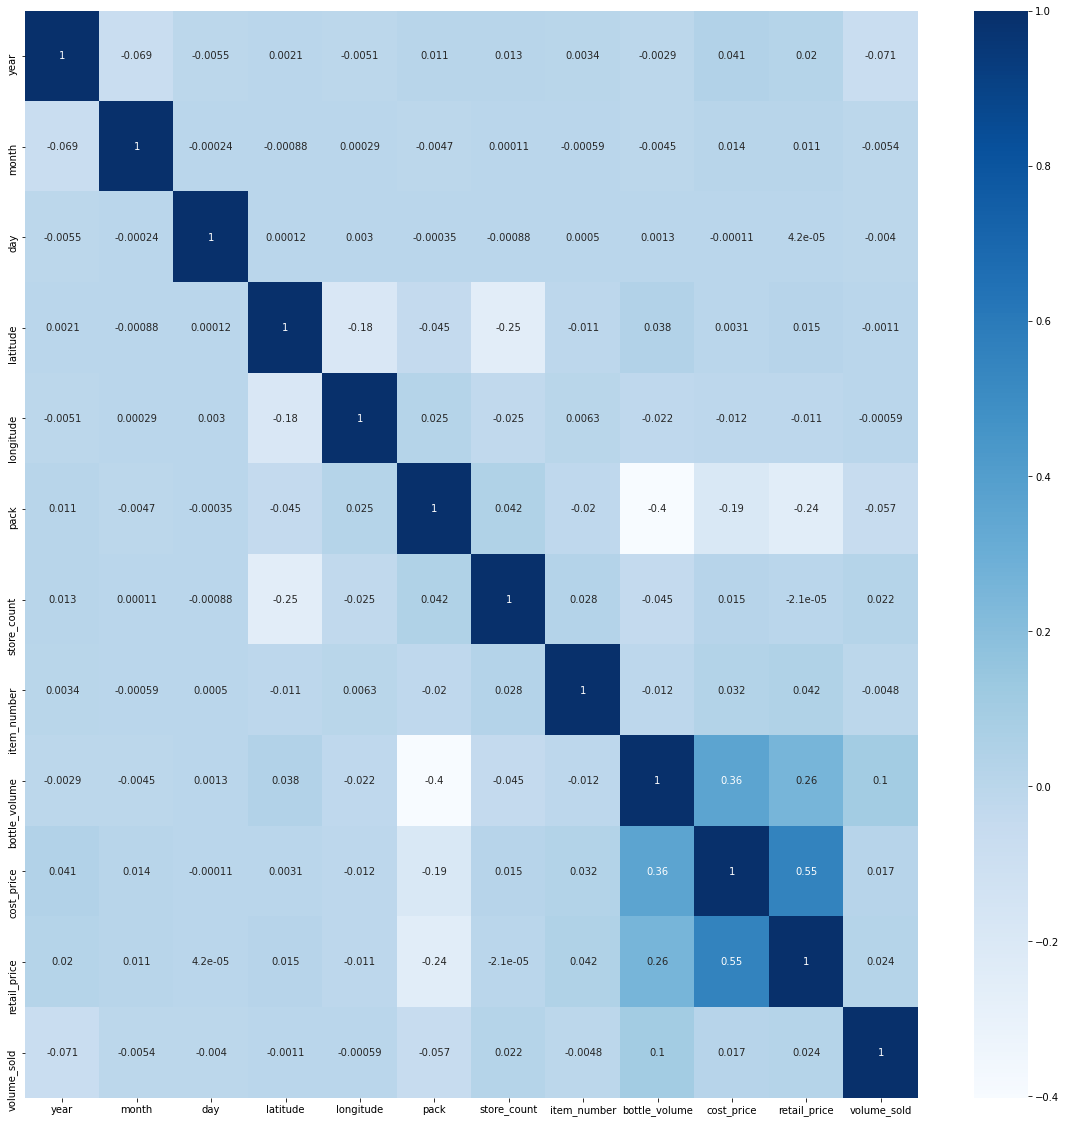

In [24]:
plt.figure(figsize=(20, 20))
cor = data_final.corr(method='pearson')
sns.heatmap(cor,annot = True,cmap= plt.cm.Blues)

#plt.show()
#plt.savefig('heatmap1.pdf')


In [39]:
data_filtered["week_of_day"] = data_filtered["week_of_day"].astype("category")

In [44]:

data_filtered.groupby(["Category","State Bottle Cost"])["State Bottle Cost"].describe()

count     mean           std      min      25%  \
Category  State Bottle Cost                                                    
1011100.0 0.94                  1.0     0.94           NaN     0.94     0.94   
          1.05                284.0     1.05  5.560914e-15     1.05     1.05   
          1.16               1192.0     1.16  1.355041e-14     1.16     1.16   
          1.17                988.0     1.17  7.553340e-15     1.17     1.17   
          1.19                114.0     1.19  1.561175e-15     1.19     1.19   
...                             ...      ...           ...      ...      ...   
1901200.0 236.21               10.0   236.21  2.995911e-14   236.21   236.21   
          245.00                3.0   245.00  0.000000e+00   245.00   245.00   
          498.64                2.0   498.64  0.000000e+00   498.64   498.64   
          1133.33               1.0  1133.33           NaN  1133.33  1133.33   
          1449.26               6.0  1449.26  0.000000e+00  1449.26  1449.26   

                                 50%      75%      max  
Category  State Bottle Cost                             
1011100.0 0.94                  0.94     0.94     0.94  
          1.05                  1.05     1.05     1.05  
          1.16                  1.16     1.16     1.16  
          1.17                  1.17     1.17     1.17  
          1.19                  1.19     1.19     1.19  
...                              ...      ...      ...  
1901200.0 236.21              236.21   236.21   236.21  
          245.00              245.00   245.00   245.00  
          498.64              498.64   498.64   498.64  
          1133.33            1133.33  1133.33  1133.33  
          1449.26            1449.26  1449.26  1449.26  

[8847 rows x 8 columns]

In [41]:
data_filtered["Vendor Number"].value_counts()

260.0    1985793
434.0    1178024
65.0     1128649
370.0     729687
115.0     640795
          ...   
462.0          1
510.0          1
119.0          1
431.0          1
436.0          1
Name: Vendor Number, Length: 262, dtype: int64

In [42]:
data_filtered["Vendor Name"].value_counts()

Diageo Americas                           1541317
Jim Beam Brands                           1128649
Luxco-St Louis                             950504
Pernod Ricard USA/Austin Nichols           572913
Constellation Wine Company, Inc.           492903
                                           ...   
Broadslab Distillery                            1
Belmont Farms Of Va., Inc                       1
10th Mountain Whiskey & Spirit Company          1
Maverick Spirit LLC                             1
3 BADGE CORPORATION                             1
Name: Vendor Name, Length: 380, dtype: int64

In [52]:
data_filtered.Category.value_counts()

1031080    1155631
1012100    1113257
1011200     644458
1031200     592038
1011100     509810
            ...   
1082390         16
1032230         14
1700000         11
1041000          1
1082300          1
Name: Category, Length: 104, dtype: int64

In [40]:
# y = Volume Sold
# candidate attributes 
# Store Number(cat); City (cat); County Number (cat); Category(cat); Item Number(cat); Bottle Volume(num);
# State Bottle Cost(num); State Bottle Retail(num); pack(int); week_of_day (cat); month(cat);  year(cat )

data_filtered.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                   category
Store Name                       object
Address                          object
City                           category
Zip Code                         object
Store Location                   object
County Number                  category
County                           object
Category                        float64
Category Name                    object
Vendor Number                   float64
Vendor Name                      object
Item Number                       int64
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
year                              int64


###  scatter plot profit vs volume 

### scatter plot sale vs volume 

### boxplot of volume vs weekday 

In [51]:
data_filtered.week_of_day.value_counts()

3    2866501
1    2843824
2    2817689
4    2377952
5     562546
6      91146
Name: week_of_day, dtype: int64

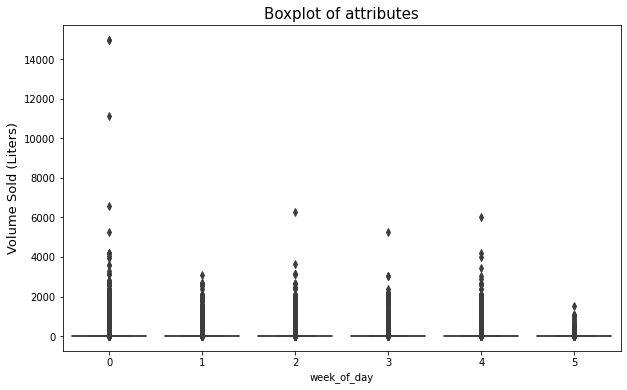

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'week_of_day', y = 'Volume Sold (Liters)', data = data_filtered[["week_of_day","Volume Sold (Liters)"]])
plt.ylabel('Volume Sold (Liters)', fontsize = 13)
plt.title("Boxplot of attributes", fontsize =15)
#plt.savefig("Boxplot of attributes.pdf")
plt.show()

In [73]:
sf = gpd.read_file("county.shp")
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
gdf_PUL = gpd.GeoDataFrame(pd.merge(data_filtered, sf, left_on = 'County', 
                                right_on = 'COUNTY')).drop('County', axis = 1)

geoJSON = gdf_PUL[['geometry','COUNTY']].drop_duplicates('COUNTY').to_json()
pd.set_option('display.max_rows', 103)
data_filtered.County.value_counts()

# Analyze total alcohol sales in different counties (chorolength)
volume_sold_df = data_filtered.loc[:, ["County", "Volume Sold (Liters)"]].groupby("County").sum().reset_index() # 103 counties

profit_df = data_filtered.loc[:, ["County", "Profit"]].groupby("County").sum().reset_index()


td_map = folium.Map(location = [41.8780, -93.0977], 
                    zoom_start= 10,tiles = "cartodbpositron")

cho_map = folium.Choropleth(
    geo_data=geoJSON,
    data=volume_sold_df[['County','Volume Sold (Liters)']],
    name='choropleth',
    fill_color='YlGn',
    fill_opacity=0.7,
    key_on = 'feature.properties.COUNTY',
    line_opacity=0.2,
    legend_name='Volume Sold (Liters)',
    highlight=True,
    line_color='green',
    columns = ['County','Volume Sold (Liters)'], reset = True,
).add_to(td_map)

cho_map.geojson.add_child(folium.features.GeoJsonTooltip(['COUNTY'], labels = False))
folium.LayerControl().add_to(td_map)
td_map.save('foliumChoropleth_map_volume_sold.html')
td_map

In [ ]:
td_map = folium.Map(location = [41.8780, -93.0977], 
                    zoom_start= 10,tiles = "cartodbpositron")

cho_map = folium.Choropleth(
    geo_data=geoJSON,
    data=profit_df[['County','Profit']],
    name='choropleth',
    fill_color='YlGn',
    fill_opacity=0.7,
    key_on = 'feature.properties.COUNTY',
    line_opacity=0.2,
    legend_name='Profit',
    highlight=True,
    line_color='green',
    columns = ['County','Profit'], reset = True,
).add_to(td_map)

cho_map.geojson.add_child(folium.features.GeoJsonTooltip(['COUNTY'], labels = False))
folium.LayerControl().add_to(td_map)
#td_map.save('foliumChoroplethMap_trip_distance.html')
td_map

In [20]:
data_all.Category.value_counts()

1031080.0    1255745
1012100.0    1199556
1011200.0     698830
1031200.0     641448
1011100.0     551093
              ...   
1082390.0         16
1032230.0         14
1700000.0         12
1041000.0          1
1082300.0          1
Name: Category, Length: 104, dtype: int64

In [17]:
data_filtered.loc[:, ["Category", 
                      "County", 
                      "Volume Sold (Liters)"]].groupby(["Category", "County"]).sum().reset_index()

,Category,County,Volume Sold (Liters)
0,1012100.0,Adair,36327.43
1,1012100.0,Adams,8752.62
2,1012100.0,Allamakee,37179.45
3,1012100.0,Appanoose,48045.19
4,1012100.0,Audubon,18219.32
...,...,...,...
296,1062310.0,Winnebago,25873.73
297,1062310.0,Winneshiek,36481.77
298,1062310.0,Woodbury,229256.33
299,1062310.0,Worth,8583.65


### Models 

In [ ]:
# linear regression 

In [ ]:
# train-test splitting 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 
X = df_final[[~"volume_sold"]]
y = df_final.volume_sold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 66)
#

In [20]:
data_filtered.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'year', 'month', 'day', 'latitude', 'longitude', 'Profit'],
      dtype='object')

In [ ]:
# candidate features 
# 

In [ ]:
from statsmodels.formula.api import *
model_full = ols(formula = "log_volume_sold~year+month+day+week_of_day+pack+city+category+county_number+store_count+item_number+bottle_volume+log_cost_price+log_store_count+log_retail_price", data = subs).fit()
model_full.summary()